In [1]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('../data/2017.csv', encoding='euc-kr')
df.head(10)

,구분,죄종,발생검거,건수
0,중부,살인,발생,0
1,중부,살인,검거,0
2,중부,강도,발생,6
3,중부,강도,검거,6
4,중부,강간,발생,173
5,중부,강간,검거,87
6,중부,절도,발생,1061
7,중부,절도,검거,489
8,중부,폭력,발생,1198
9,중부,폭력,검거,1024


In [4]:
df.shape

(310, 4)

In [5]:
df.dtypes

구분      object
죄종      object
발생검거    object
건수       int64
dtype: object

In [6]:
df.columns

Index(['구분', '죄종', '발생검거', '건수'], dtype='object')

In [12]:
tmp = pd.pivot_table(df,
                    index = '구분',
                    columns = ['죄종', '발생검거'], 
                    values = ['건수'])

In [14]:
tmp.head()

건수                                             
죄종     강간       강도      살인        절도          폭력      
발생검거   검거   발생  검거  발생  검거  발생    검거    발생    검거    발생
구분                                                    
강남    366  456  16  13   6   6   787  2069  1942  2229
강동    169  172  12  10   6   5   949  1645  2109  2429
강북    153  208   5   7   8   8   635  1014  2023  2156
강서    253  316   6   4  11  11  1113  1888  2544  2916
관악    323  379   6   7   7   8  1152  1979  2666  3152

In [15]:
tmp.columns

MultiIndex(levels=[['건수'], ['강간', '강도', '살인', '절도', '폭력'], ['검거', '발생']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[None, '죄종', '발생검거'])

In [17]:
tmp.columns.levels[0]

Index(['건수'], dtype='object')

In [18]:
tmp.columns.levels[1]

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object', name='죄종')

In [19]:
tmp.columns.levels[2]

Index(['검거', '발생'], dtype='object', name='발생검거')

In [21]:
# 새로 규정된 컬럼명 생성
new_cols = [ fStr+bStr
           for fStr in tmp.columns.levels[1] 
           for bStr in tmp.columns.levels[2]]

In [22]:
new_cols

['강간검거',
 '강간발생',
 '강도검거',
 '강도발생',
 '살인검거',
 '살인발생',
 '절도검거',
 '절도발생',
 '폭력검거',
 '폭력발생']

In [23]:
# 전체 컬럼명을 변경하는 방법 -> 순서 주의해서 덮어라
tmp.columns = new_cols

In [24]:
tmp.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


In [25]:
# 복사
crime_data = tmp[:]

In [26]:
crime_data.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구분,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229
강동,169,172,12,10,6,5,949,1645,2109,2429
강북,153,208,5,7,8,8,635,1014,2023,2156
강서,253,316,6,4,11,11,1113,1888,2544,2916
관악,323,379,6,7,7,8,1152,1979,2666,3152


- 각 관할서 이름 -> 풀 네이밍 구성 / ex) 강남 -> 서울강남경찰서
- '서울강남경찰서'의 gps획득(kakao api 활용)
- '서울강남경찰서'의 주소 획득 -> 자치구 정보 획득(1개 관할서는 보정)

In [31]:
import urllib.request
import json

In [32]:
API_KEY = '91c118870de7d5d8f79c11d0ce70ec28'
url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'

ys = []
xs = []
address_names = []

for policeName in crime_data.index :
    policeName = "서울%s경찰서" % policeName
    print(policeName)
    
    '''
    GET /v2/local/search/keyword.{format} HTTP/1.1
    Host: dapi.kakao.com
    Authorization: KakaoAK {app_key}
    '''
    
    # 통신 객체
    tmp_url = url.format(urllib.parse.quote(policeName))
    print(tmp_url)
    request = urllib.request.Request(tmp_url)
    # 키 설정
    request.add_header('Authorization', 'KakaoAK {app_key}'.format(app_key=API_KEY))
    # 통신 요청
    response = urllib.request.urlopen(request)
    # 응답 코드가 정상이면
    rescode = response.getcode()
    if rescode == 200 :
        tmp = json.load(response)
        y = tmp['documents'][0]['y']
        x = tmp['documents'][0]['x']
        address_name = tmp['documents'][0]['address_name']
        ys.append(y)
        xs.append(x)
        address_names.append(address_name)
    else :
         pass

서울강남경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%82%A8%EA%B2%BD%EC%B0%B0%EC%84%9C
서울강동경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%8F%99%EA%B2%BD%EC%B0%B0%EC%84%9C
서울강북경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EB%B6%81%EA%B2%BD%EC%B0%B0%EC%84%9C
서울강서경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B0%95%EC%84%9C%EA%B2%BD%EC%B0%B0%EC%84%9C
서울관악경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B4%80%EC%95%85%EA%B2%BD%EC%B0%B0%EC%84%9C
서울광진경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B4%91%EC%A7%84%EA%B2%BD%EC%B0%B0%EC%84%9C
서울구로경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B5%AC%EB%A1%9C%EA%B2%BD%EC%B0%B0%EC%84%9C
서울금천경찰서
https://dapi.kakao.com/v2/local/search/keyword.json?query=%EC%84%9C%EC%9A%B8%EA%B8

In [33]:
len(ys), len(xs), len(address_names)

(31, 31, 31)

In [34]:
crime_data['위도'] = ys
crime_data['경도'] = xs
crime_data['주소'] = address_names

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [36]:
crime_data.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소
구분,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15


In [39]:
# '주소' 데이터로부터 자치구 정보를 추출하여 '자치구' 컬럼을 추가하세요
tmp = []
for addr in crime_data['주소'] :
    print(addr.split()[1])
    tmp.append(addr.split()[1])

강남구
강동구
강북구
양천구
관악구
광진구
구로구
금천구
중구
노원구
도봉구
동대문구
동작구
마포구
서초구
서대문구
은평구
서초구
성동구
성북구
송파구
강남구
양천구
영등포구
용산구
은평구
종로구
성북구
중랑구
중구
종로구


In [41]:
crime_data['자치구'] = tmp
# crime_data['자치구'] = [addr.split()[1] for addr in crime_data['주소']]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
crime_data.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구
구분,,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15,강북구


In [43]:
# pandas 방식으로 추가해보세요
crime_data['자치구2'] = crime_data['주소'].apply(lambda x : x.split()[1])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
crime_data

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구,자치구2
구분,,,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998,강남구,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1,강동구,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15,강북구,강북구
강서,253,316,6,4,11,11,1113,1888,2544,2916,37.5397837301896,126.829985881518,서울 양천구 신월동 25,양천구,양천구
관악,323,379,6,7,7,8,1152,1979,2666,3152,37.4745875338795,126.951062346192,서울 관악구 봉천동 1695-5,관악구,관악구
광진,208,261,8,13,5,6,1168,2220,1900,2146,37.5428136101647,127.083842771963,서울 광진구 구의동 254-32,광진구,광진구
구로,181,328,6,8,8,7,869,1725,2344,2827,37.4948844667899,126.886660285169,서울 구로구 구로동 436,구로구,구로구
금천,212,240,5,5,5,5,674,1141,1676,1874,37.45725314643252,126.89674921449215,서울 금천구 시흥동 산 189,금천구,금천구
남대문,62,94,3,3,0,1,400,785,780,863,37.5549786547527,126.973499492486,서울 중구 남대문로5가 561,중구,중구


In [45]:
del crime_data['자치구2']

In [47]:
def mod(x) :
    return x.split()[1]

In [48]:
crime_data['자치구3'] = crime_data['주소'].apply(mod)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
crime_data.head(3)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구,자치구3
구분,,,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998,강남구,강남구
강동,169,172,12,10,6,5,949,1645,2109,2429,37.5286763457485,127.126894359114,서울 강동구 성내동 541-1,강동구,강동구
강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408362838,127.027340967017,서울 강북구 번동 415-15,강북구,강북구


In [51]:
del crime_data['자치구3']

In [53]:
crime_data.head(1)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구
구분,,,,,,,,,,,,,,
강남,366,456,16,13,6,6,787,2069,1942,2229,37.5093899463715,127.067070541137,서울 강남구 대치동 998,강남구


In [54]:
# 자치구의 값을 조사하여 중복되지 않는 개수가 25개인지 체크!
crime_data.iloc[ :, -2:]

,주소,자치구
구분,,
강남,서울 강남구 대치동 998,강남구
강동,서울 강동구 성내동 541-1,강동구
강북,서울 강북구 번동 415-15,강북구
강서,서울 양천구 신월동 25,양천구
관악,서울 관악구 봉천동 1695-5,관악구
광진,서울 광진구 구의동 254-32,광진구
구로,서울 구로구 구로동 436,구로구
금천,서울 금천구 시흥동 산 189,금천구
남대문,서울 중구 남대문로5가 561,중구


In [57]:
# 확인 결과, '강서구'가 없다
len(crime_data['자치구'].unique())

24

In [58]:
# 구분값이 강서인 데이터의 자치구의 값을 '양천구'에서 '강서구'로 변경
crime_data.loc['강서', '자치구'] = '강서구'

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


###### 데이터 백업 : .to_csv(  (위치), sep, encoding  )

In [60]:
# 현재까지 데이터 덤프(백업)
crime_data.to_csv('../data/crime_data_gps_addr.csv', sep=',', encoding='utf-8')

###### 불러오기 : pd.read_csv(  (위치),  encoding   )

In [61]:
crime_anal_raw = pd.read_csv('../data/crime_data_gps_addr.csv', encoding = 'utf-8')
crime_anal_raw.head()

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,위도,경도,주소,자치구
0,강남,366,456,16,13,6,6,787,2069,1942,2229,37.509390,127.067071,서울 강남구 대치동 998,강남구
1,강동,169,172,12,10,6,5,949,1645,2109,2429,37.528676,127.126894,서울 강동구 성내동 541-1,강동구
2,강북,153,208,5,7,8,8,635,1014,2023,2156,37.637408,127.027341,서울 강북구 번동 415-15,강북구
3,강서,253,316,6,4,11,11,1113,1888,2544,2916,37.539784,126.829986,서울 양천구 신월동 25,강서구
4,관악,323,379,6,7,7,8,1152,1979,2666,3152,37.474588,126.951062,서울 관악구 봉천동 1695-5,관악구


In [63]:
crime_anal_raw.shape

(31, 15)

In [66]:
# 자치구별로 통합 : 데이터를 자치구 기준으로 25개로 구성
# 자치구 내에 경찰서가 2개인 자치구는 합산으로 수치를 맞춘다
crime_anal = pd.pivot_table(crime_anal_raw,
                           index = '자치구',
                           aggfunc = np.sum)
crime_anal.head(2)

,강간검거,강간발생,강도검거,강도발생,경도,살인검거,살인발생,위도,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,,,
강남구,496,607,24,20,254.144214,7,7,75.002887,1383,3130,3411,3956
강동구,169,172,12,10,127.126894,6,5,37.528676,949,1645,2109,2429


In [67]:
# '경도', '위도' 컬럼 삭제
try :
    del crime_anal['경도']
    del crime_anal['위도']
except Exception as e :
    pass

In [68]:
crime_anal.head(2)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
자치구,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956
강동구,169,172,12,10,6,5,949,1645,2109,2429


In [72]:
# 검거율 정보 생성
# 강간검거율 = 강감검거/강간발생
crime_anal['강간검거율'] = crime_anal['강간검거'] / crime_anal['강간발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도검거'] / crime_anal['강도발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인검거'] / crime_anal['살인발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도검거'] / crime_anal['절도발생'] * 100
crime_anal['폭력검거율'] = crime_anal['폭력검거'] / crime_anal['폭력발생'] * 100

In [74]:
crime_anal.head(1)

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,,,,,,
강남구,496,607,24,20,7,7,1383,3130,3411,3956,81.713344,120.0,100.0,44.185304,86.223458


In [75]:
# 기존 '검거' 데이터는 삭제
del crime_anal['강간검거']
del crime_anal['강도검거']
del crime_anal['살인검거']
del crime_anal['절도검거']
del crime_anal['폭력검거']

In [77]:
crime_anal.head(1)

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,120.0,100.0,44.185304,86.223458


###### 컬럼명 중에서 특정 단어가 들어간 컬럼을 뽑는 방법 : filter( 추출 조건, 데이터  )

###### crime_anal.loc[crime_anal[col]>100, col] = 100.0

In [95]:
# xx검거율이 100이상인 것들은 이상치에 해당되므로 일괄적으로 100으로 통일
col_list = crime_anal.columns[-5:]
for col in col_list : 
    crime_anal.loc[crime_anal[col]>100, col] = 100.0

In [97]:
crime_anal.head(3)

,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169


In [98]:
# 컬럼명 변경
crime_anal.rename(columns = {
    '강간발생' : '강간',
    '강도발생' : '강도',
    '살인발생' : '살인',
    '절도발생' : '절도',
    '폭력발생' : '폭력'
}, inplace = True)

In [99]:
crime_anal.head(3)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169


### 정규화 : normalize
- 절도, 폭력 -> 4자리 수 / 강도, 살인 -> 1~2자리 수 => 편차가 너무 크다
- 숫자의 범위를 비슷한 범위 내에 두고 비교하는 것이 편하고, 합리적이다
- 0 ~ 1 사이로 값을 배치하여 종합적으로 비교

In [100]:
# 머신러닝 모듈 scikit-learn 비지도 학습의 전처리 도구
# 최대, 최소 전처리기를 이용해서 처리
from sklearn import preprocessing

In [101]:
# 정규화 대상 컬럼
cols = crime_anal.columns[:5]
cols

Index(['강간', '강도', '살인', '절도', '폭력'], dtype='object')

###### 데이터를 획득 : DataFrame에서 데이터만 추출 → numpy의 배열로 리턴

In [104]:
x = crime_anal[cols].values
x

array([[ 607,   20,    7, 3130, 3956],
       [ 172,   10,    5, 1645, 2429],
       [ 208,    7,    8, 1014, 2156],
       [ 316,    4,   11, 1888, 2916],
       [ 379,    7,    8, 1979, 3152],
       [ 261,   13,    6, 2220, 2146],
       [ 328,    8,    7, 1725, 2827],
       [ 240,    5,    5, 1141, 1874],
       [ 180,    9,    4, 1538, 2478],
       [ 104,    3,    1,  633, 1258],
       [ 165,    3,   11, 1547, 2249],
       [ 396,    7,    1, 1226, 1700],
       [ 500,    8,    3, 2094, 2673],
       [ 202,    1,    4, 1230, 1676],
       [ 470,   13,    9, 1812, 2404],
       [ 132,    3,    1, 1072, 1559],
       [ 173,    8,    7, 1344, 1902],
       [ 288,    1,    6, 2274, 3007],
       [ 138,    3,    3, 1590, 2148],
       [ 455,    5,   15, 2304, 3190],
       [ 327,    5,    1, 1346, 2381],
       [ 230,    4,    6, 1387, 2256],
       [ 253,   10,    7, 1644, 2143],
       [ 267,    9,    1, 1846, 2061],
       [ 172,    3,    5, 1533, 2858]], dtype=int64)

###### 전처리기 : preprocessing.MinMaxScaler()

In [105]:
# 전처리기 획득
min_max_scaler = preprocessing.MinMaxScaler()

###### 정규화 : ( preprocessing.MinMaxScaler() ).fit_transform(x.astype(float))

In [106]:
# 정규화(입력원이 부동소수)
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 1.        , 0.42857143, 1.        , 1.        ],
       [0.13518887, 0.47368421, 0.28571429, 0.40528634, 0.4340252 ],
       [0.20675944, 0.31578947, 0.5       , 0.1525831 , 0.33283914],
       [0.42147117, 0.15789474, 0.71428571, 0.50260312, 0.61452928],
       [0.54671968, 0.31578947, 0.5       , 0.53904686, 0.70200148],
       [0.31212724, 0.63157895, 0.35714286, 0.63556268, 0.32913269],
       [0.44532803, 0.36842105, 0.42857143, 0.43732479, 0.58154188],
       [0.27037773, 0.21052632, 0.28571429, 0.20344413, 0.22831727],
       [0.15109344, 0.42105263, 0.21428571, 0.36243492, 0.45218681],
       [0.        , 0.10526316, 0.        , 0.        , 0.        ],
       [0.12127237, 0.10526316, 0.71428571, 0.36603925, 0.36730912],
       [0.5805169 , 0.31578947, 0.        , 0.23748498, 0.16382506],
       [0.78727634, 0.36842105, 0.14285714, 0.58510212, 0.52446256],
       [0.19483101, 0.        , 0.21428571, 0.2390869 , 0.15492958],
       [0.72763419, 0.63157895, 0.

In [108]:
# 데이터 프레임 재구성
crime_anal_norm = pd.DataFrame(x_scaled, columns = cols, index = crime_anal.index)
crime_anal_norm

,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000
강동구,0.135189,0.473684,0.285714,0.405286,0.434025
강북구,0.206759,0.315789,0.500000,0.152583,0.332839
강서구,0.421471,0.157895,0.714286,0.502603,0.614529
관악구,0.546720,0.315789,0.500000,0.539047,0.702001
광진구,0.312127,0.631579,0.357143,0.635563,0.329133
구로구,0.445328,0.368421,0.428571,0.437325,0.581542
금천구,0.270378,0.210526,0.285714,0.203444,0.228317
노원구,0.151093,0.421053,0.214286,0.362435,0.452187


In [110]:
# 검거율 데이터 추가
crime_anal_norm[col_list] = crime_anal[col_list]

In [111]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
자치구,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854


In [113]:
# 1차 분석 데이터(cctv 인구수) 로드
# 데이터를 df로 구성 시 인덱스 직접 지정
result_cctv = pd.read_csv('../data/population_per_cctv_analysis_result.csv',
                         encoding = 'utf-8',
                         index_col = '자치구')
result_cctv.head(2)

,소계,2014년도 이전,2015년,2016년,2017년,2018년,최신증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
자치구,,,,,,,,,,,,,,,
강남구,5221,2885.0,546,765,577,448,80.970537,547453,542364,5089,67085,0.929578,12.254020,0.953689,2586.344483
강동구,1879,883.0,144,194,273,385,112.797282,431920,427573,4347,58770,1.006436,13.606686,0.435034,426.108759


In [114]:
# result_cctv에서 필요한 컬럼 추가 (추가 대상의 컬럼명은 자유롭게 변경 가능)
crime_anal_norm[['인구수', 'cctv소계']] = result_cctv[['인구수', '소계']]

In [115]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계
자치구,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879


###### 행 합계 : np.sum( (데이터), axis = 1 )

In [119]:
# 자치구별 (5대) 범죄 합계
cols = crime_anal_norm.columns[:5]
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[cols], axis=1)

In [120]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계,범죄
자치구,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221,4.428571
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879,1.733899


In [124]:
# 자치구별 검거율 합계
cols = crime_anal_norm.columns[5:-3]
crime_anal_norm['검거'] = np.sum(crime_anal_norm[cols], axis=1)

In [125]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계,범죄,검거
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221,4.428571,412.122106
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879,1.733899,442.771638


## 보다 향상된 시각화 도구 : seaborn
<a href = '/notebooks/analysis/pandas/basic/seaborn_basic.ipynb'>seaborn 기초</a>

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [127]:
from korea_font import initKoreaFontLoad
initKoreaFontLoad()

Malgun Gothic


In [128]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계,범죄,검거
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221,4.428571,412.122106
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879,1.733899,442.771638


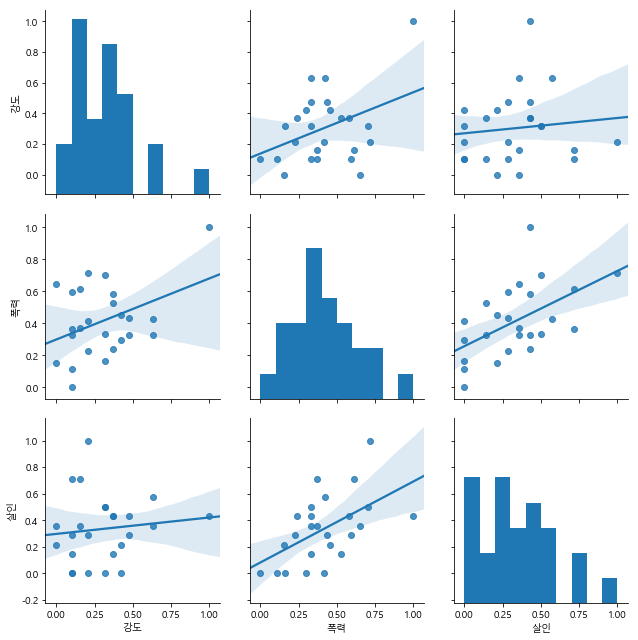

In [129]:
# 변수간의 상관성 -> 산포행렬
# 범죄들간의 연관성
# kind = 'reg' : 선형회귀
sns.pairplot(crime_anal_norm, vars = ['강도', '폭력', '살인'],
            size = 3, kind = 'reg')
plt.show()

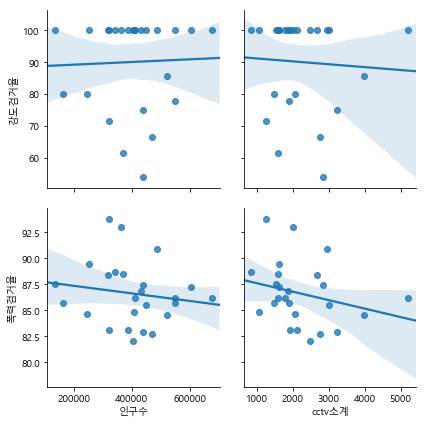

In [132]:
# x : 인구수, cctv소계 / y : 강도검거율, 폭력검거율
sns.pairplot(crime_anal_norm, 
             x_vars=['인구수', 'cctv소계'],
             y_vars=['강도검거율', '폭력검거율'],
             size = 3, kind='reg')
plt.show()

###### 최댓값 : crime_anal_norm[ ].max()

In [133]:
# 검거 항목의 최댓값을 100으로 하고, 그 기준으로 값을 배치
# 정규화 : 값을 동일 범위 내로 배치
crime_anal_norm['검거'] = crime_anal_norm['검거'] / crime_anal_norm['검거'].max() * 100

In [134]:
crime_anal_norm['검거']

자치구
강남구      90.658174
강동구      97.400425
강북구      88.308492
강서구      93.767633
관악구      88.262360
광진구      80.449525
구로구      79.956724
금천구      96.095302
노원구      87.732638
도봉구     100.000000
동대문구     96.794209
동작구      83.216010
마포구      89.949141
서대문구     94.849146
서초구      76.459876
성동구      92.247281
성북구      91.358285
송파구      91.374543
양천구      77.445992
영등포구     82.610569
용산구      87.894267
은평구      99.170251
종로구      76.014441
중구       64.122479
중랑구      92.751632
Name: 검거, dtype: float64

In [137]:
# 검거값 기준으로 내림차순 정렬
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계,범죄,검거
자치구,,,,,,,,,,,,,,
도봉구,0.000000,0.105263,0.000000,0.000000,0.000000,100.000000,100.0,100.0,65.876777,88.712242,341649,858,0.105263,100.000000
은평구,0.250497,0.157895,0.357143,0.301962,0.369904,92.608696,100.0,100.0,67.339582,90.868794,487666,2962,1.437401,99.170251


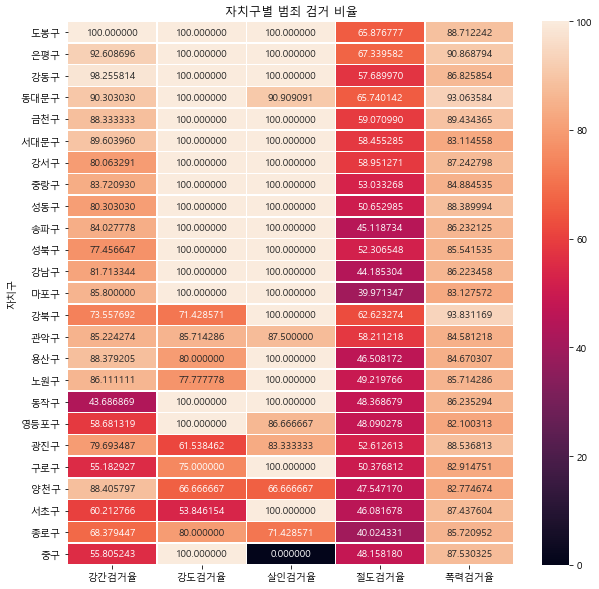

In [140]:
# 자치구별 범죄 검거 비율 (범죄별로)
# 히트맵 사용
# x : xx검거율 / y : 자치구
plt.figure(figsize = (10, 10))
sns.heatmap(crime_anal_norm_sort.iloc[:, -9:-4], annot=True, fmt='f', linewidths=.5) #, cmap='RdPu')
plt.title('자치구별 범죄 검거 비율')
plt.show()

### 지도 시각화
- 공간 시각화의 한 범주
- folium 사용
- geoJson 데이터를 이용하여 지도 상에 행정구역을 표현
- 구역별 정보 시각화

#### 검거율, 발생율에 따른 서울시 행정구역 칼라맵 + 마커

In [141]:
import folium
import pandas as pd

In [143]:
gps = [37.561505, 126.984435]
map_seoul = folium.Map(location=gps, zoom_start = 10)
map_seoul

In [145]:
import json

# 자료구조를 유지해서 덤프칠 때
geo_str = json.load(open('../data/seoul.json', encoding='utf-8'))
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [154]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계,범죄,검거,범죄발생율
자치구,,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221,4.428571,90.658174,88.571429
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879,1.733899,97.400425,34.677978


In [148]:
# 범죄값 5.0 기준으로 정규화
# 범죄발생율 = 범죄 / 5.0 *100
crime_anal_norm['범죄발생율'] = crime_anal_norm['범죄'] / 5.0 *100

In [149]:
crime_anal_norm.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv소계,범죄,검거,범죄발생율
자치구,,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.428571,1.000000,1.000000,81.713344,100.0,100.0,44.185304,86.223458,547453,5221,4.428571,90.658174,88.571429
강동구,0.135189,0.473684,0.285714,0.405286,0.434025,98.255814,100.0,100.0,57.689970,86.825854,431920,1879,1.733899,97.400425,34.677978


In [168]:
gps = [37.561505, 126.984435]
map_seoul = folium.Map(location=gps, zoom_start = 10)
folium.Choropleth(geo_data=geo_str, 
                  data=crime_anal_norm,
                  columns = [crime_anal_norm.index, crime_anal_norm.columns[-1]],
                  key_on='feature.id',
                  fill_color = 'PuRd', #'YlGn',
                  legend_name = '서울시 자치구별 범죄비율').add_to(map_seoul)
map_seoul

In [164]:
# crime_anal 데이터에서 인구수 대비 범죄를 계산하여 범죄발생율 대입
# 범죄발생율 = 범죄 / 인구수 * 100
cols = crime_anal.columns[:5]
crime_anal['5대 범죄'] = np.sum(crime_anal[cols], axis=1)
crime_anal['인구수'] = crime_anal_norm['인구수']

In [165]:
crime_anal.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,5대 범죄,인구수
자치구,,,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.0,100.0,44.185304,86.223458,7720,547453
강동구,172,10,5,1645,2429,98.255814,100.0,100.0,57.689970,86.825854,4261,431920


In [166]:
crime_anal['인구대비 범죄발생율'] = crime_anal['5대 범죄'] / crime_anal['인구수'] * 100

In [167]:
crime_anal.head(2)

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,5대 범죄,인구수,인구대비 범죄발생율
자치구,,,,,,,,,,,,,
강남구,607,20,7,3130,3956,81.713344,100.0,100.0,44.185304,86.223458,7720,547453,1.410167
강동구,172,10,5,1645,2429,98.255814,100.0,100.0,57.689970,86.825854,4261,431920,0.986525


In [187]:
gps = [37.561505, 126.984435]
map_seoul = folium.Map(location=gps, zoom_start = 10)
folium.Choropleth(geo_data=geo_str,
                  name = 'choropleth',
                  data=crime_anal,
                  columns = [crime_anal.index, crime_anal.columns[-1]],
                  key_on='feature.id',
                  fill_color = 'PuRd',
                  legend_name = '서울시 자치구별 범죄비율').add_to(map_seoul)
map_seoul

### 경찰서별 검거현황 및 자치구별 범죄 발생현황
- 경찰서 마킹
- 검거(순수 카운트, 총량)를 서클마커로 표시
- 자치구별 범죄 현황 색상 표시

In [175]:
# 구분
crime_anal_raw.columns

Index(['구분', '강간검거', '강간발생', '강도검거', '강도발생', '살인검거', '살인발생', '절도검거', '절도발생',
       '폭력검거', '폭력발생', '위도', '경도', '주소', '자치구'],
      dtype='object')

In [176]:
crime_anal_raw['구분']

0      강남
1      강동
2      강북
3      강서
4      관악
5      광진
6      구로
7      금천
8     남대문
9      노원
10     도봉
11    동대문
12     동작
13     마포
14     방배
15    서대문
16     서부
17     서초
18     성동
19     성북
20     송파
21     수서
22     양천
23    영등포
24     용산
25     은평
26     종로
27     종암
28     중랑
29     중부
30     혜화
Name: 구분, dtype: object

In [177]:
crime_anal_raw['위도']

0     37.509390
1     37.528676
2     37.637408
3     37.539784
4     37.474588
5     37.542814
6     37.494884
7     37.457253
8     37.554979
9     37.642335
10    37.653398
11    37.585080
12    37.513147
13    37.551012
14    37.481559
15    37.564902
16    37.612731
17    37.495613
18    37.561795
19    37.589770
20    37.501978
21    37.493497
22    37.516555
23    37.525852
24    37.541181
25    37.628524
26    37.575541
27    37.602096
28    37.618239
29    37.563620
30    37.571892
Name: 위도, dtype: float64

In [178]:
crime_anal_raw['경도']

0     127.067071
1     127.126894
2     127.027341
3     126.829986
4     126.951062
5     127.083843
6     126.886660
7     126.896749
8     126.973499
9     127.071405
10    127.052708
11    127.045763
12    126.942857
13    126.953941
14    126.983009
15    126.966791
16    126.927677
17    127.005288
18    127.036472
19    127.016255
20    127.127161
21    127.077143
22    126.865543
23    126.900945
24    126.967779
25    126.928631
26    126.984899
27    127.032234
28    127.104542
29    126.989591
30    126.998936
Name: 경도, dtype: float64

In [188]:
for n in range(crime_anal_raw.shape[0]) :
    folium.Marker([crime_anal_raw['위도'][n], crime_anal_raw['경도'][n]],
                 popup = '서울%s경찰서' % crime_anal_raw['구분'][n],
                 icon = folium.Icon(icon='info-sign', color='red')).add_to(map_seoul)
    folium.CircleMarker([crime_anal_raw['위도'][n], crime_anal_raw['경도'][n]],
                        radius = 5, popup = '%s서 검거량' %crime_anal_raw['구분'][n], 
                        color='#3186cc', 
                        fill_color ='#00ff00').add_to(map_seoul)

In [189]:
map_seoul

In [ ]:
# https://github.com/vuski/admdongkor